In [1]:
#Librerías
import numpy as np
from scipy.interpolate import CubicSpline
import sympy as sp
import scipy as sc
from scipy import optimize
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
init_printing() 
from scipy import optimize


In [2]:
x_ = np.linspace(0.1, 5, 100)
derivada = np.vectorize(derivative ) #Convierte derivative en una función numpy

Empleando la funcion derivative


In [3]:
from scipy import misc
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative     
        
    return fp(func,x0,**kwargs)

# Tarea Derivada

Los siguientes datos, son datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa kinovea. Dados los datos en formato csv, se pide  construir un programa que realice lo siguiente

1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]


In [4]:
#Lectura del archivo csv 
route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"
df = pd.read_csv(route,";")

In [5]:
col = ["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

In [6]:
#Renombrando las columnas del data frame

df = df.rename(columns = {'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})
df

,Tiempo[ms],AnguloDeg
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [7]:
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",", ".").astype("float64")

In [8]:
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"].values )

In [9]:
df["AnguloRad"] = df["AnguloRad"] - np.pi/2
print(df["AnguloRad"])

0      -0.535997
1      -0.523907
2      -0.502001
3      -0.462644
4      -0.429547
          ...   
2842    0.086177
2843    0.113095
2844    0.138591
2845    0.162631
2846    0.185665
Name: AnguloRad, Length: 2847, dtype: float64



2. Construya una grafica de : plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?


Text(0, 0.5, 'Ángulo [deg]')

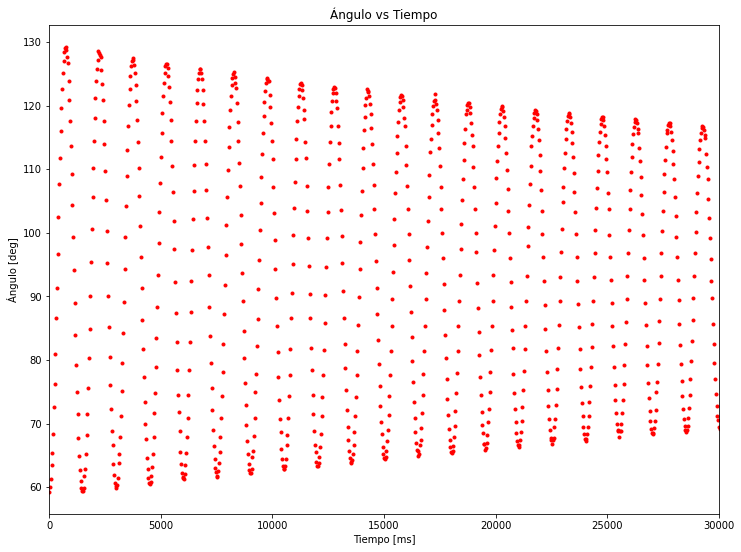

In [10]:
#Gráfica Ángulo  vs Tiempo en grados
plt.figure(figsize=(12,9))
plt.plot(df["Tiempo[ms]"], df["AnguloDeg"], "r.")
plt.xlim(0, 30000 )
plt.title("Ángulo vs Tiempo")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Ángulo [deg]")

Text(0, 0.5, 'Ángulo [rad]')

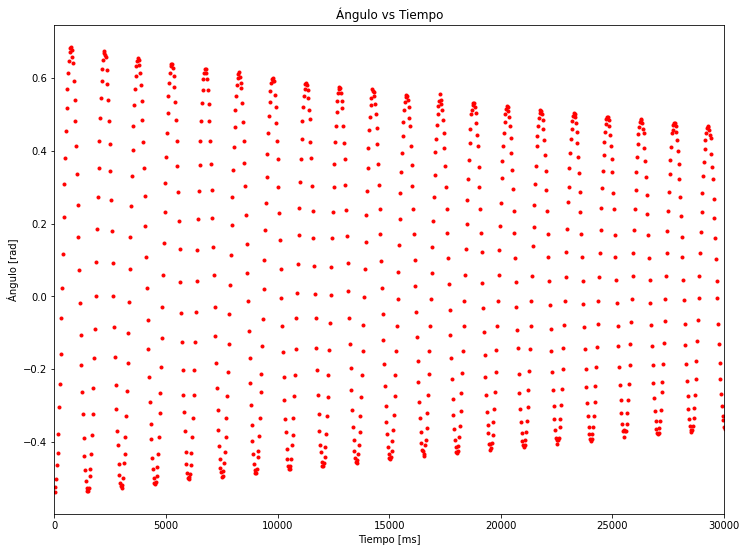

In [11]:
#Gráfica Ángulo vs Tiempo en radianes
plt.figure(figsize=(12,9))
plt.plot(df["Tiempo[ms]"], df["AnguloRad"], "r.")
plt.xlim(0, 30000 )
plt.title("Ángulo vs Tiempo")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Ángulo [rad]")

**Del gráfico podemos observar que a medida que el tiempo avanza, el ángulo y la amplitud  van disminuyendo por tanto el movimiento del péndulo es amortiguado**

3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la trasnformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentra el valor máximo empleando metodos de diferenciación.


Queremos encontrar la frecuencia a la que ejecuta su oscilacion el pendulo.


Para esto buscamos  la tranformada de fourier de los datos,
es decir, pasar el dominio del tiempo al dominio de las frecuencias a traves de una tranformacion.
En el espacio de fourier se puede determinar cual es la frecuencia de oscilcion del sistema



In [12]:
#Librerías para calcular transformada de Fourier
from scipy.fft import fft, fftfreq

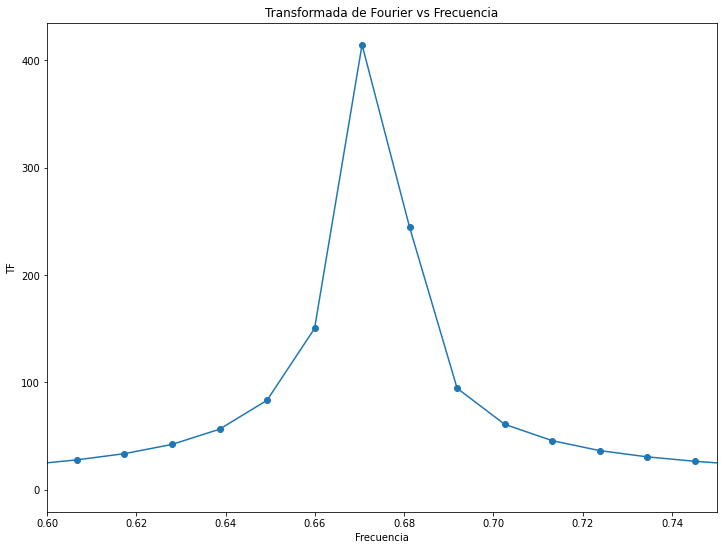

In [13]:
#Se aplica la transformada de Fourier como es indicado


tf = fft(df['AnguloRad'].values)   # Se aplica la transformada a los valores asociados al ángulo y a partir de la tranformada con fftfreq se conruye la tasa de muestreo que se va a tener 

T = 33E-3 #Paso del tiempo

N = len(df['Tiempo[ms]']) #Longitud del dataframe analizado


xf = fftfreq(N, T)[:N//2] #Frecuencia                                                                       

plt.figure(figsize=(12,9))
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-") # Valores de frecuencia y valores asociados a la tranformada de Fourier 
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.title("Transformada de Fourier vs Frecuencia")
plt.xlim(0.6, 0.75)

Ahora determinamos donde se encuentra el valor maximo de l atransformada de fourier. 
Tomamos todo el conjunto de puntos ybuscamos una funcion que inteprole los datos. A esta funcin le buscamos la deriva da para encontrar el maximo y asi determinar la frecuencia de osclacion del pendulo

In [14]:
#Se realiza interpolación a los datos obtenidos en la transformada

cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))   #frecuencia
cs

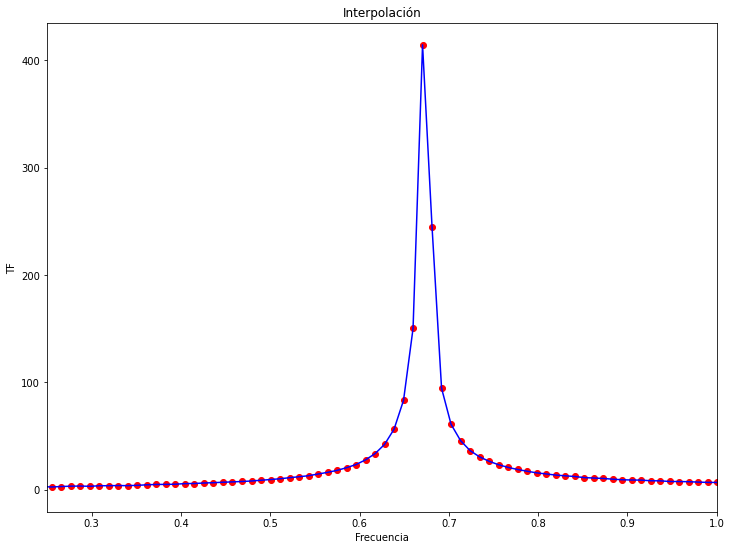

In [15]:
#Gráfica de interpolación

plt.figure(figsize=(12,9))

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"ro") #Puntos experimentales 
plt.title("Interpolación")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.plot(abs(xf[1:N//2]), abs(cs(xf[1:N//2])),"b" ) #Gráfico de la función de interpolación valor absoluto
plt.xlim(0.25, 1)

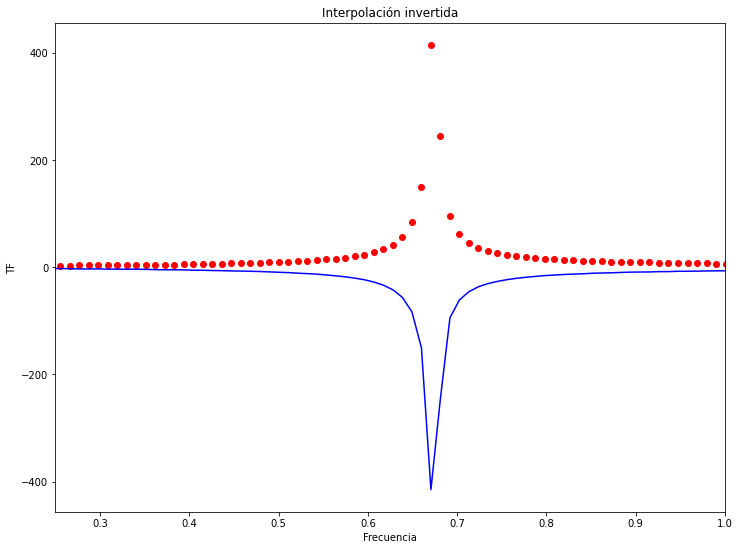

In [16]:
#Gráfica de interpolación
plt.figure(figsize=(12,9))
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"ro") #Puntos experimentales 
plt.plot(abs(xf[1:N//2]), -abs(cs(xf[1:N//2])),"b" ) #Gráfico de la función de interpolación
plt.title("Interpolación invertida")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0.25, 1)

In [17]:
#Buscamos el máximo haciendo uso de fmil_powel

cs1 = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2])) #Función que interpola los datos

#Se pone - en la función para poder hallar el máximo

min = optimize.fmin_powell(cs1, 0.2) # Máximo de la función cs y mínimo de cs1


Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44


In [18]:
abs(cs(min)) #Tenemos el valor máximo de TF

In [19]:
min   # Valor de frecuencia en que ocurre el máximo de cs y el mínimo de cs1
      #esta es la frecuncia con la que se mueve el péndulo

array(0.67156)

In [20]:
cs(0.67156),cs1(min)

(array(417.86792463), array(-417.86792463))

**Aplicando la función Derivada**

In [21]:
s=derivada(cs,xf[1:N//2], dx=1E-5)  # arreglo de los valores de la derivada en cada punto 
s 

array([-274.26907365,  -68.41190867,    1.94778104, ...,   -6.33752204,
        -16.15830674,   84.62341932])

In [22]:
#Interpolacion para encontrar la función derivada que se ajusta a los datos anteriores

devcs = CubicSpline(xf[1:N//2],s) #Función que interpola los datos

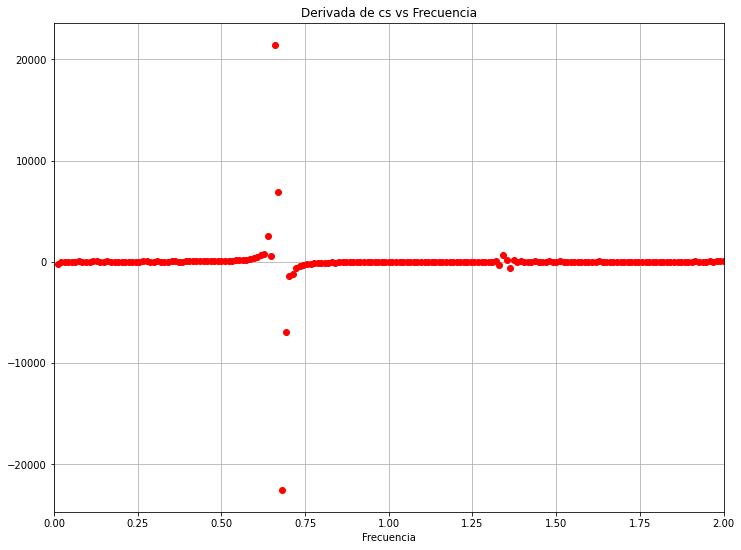

In [23]:
plt.figure(figsize=(12,9))
plt.plot(xf[1:N//2],devcs(xf[1:N//2]),"ro") #Gráfico de la derivada de cs
plt.xlabel("Frecuencia")
plt.title("Derivada de cs vs Frecuencia")
plt.grid()
plt.xlim(0,2)
#plt.ylim(-0.5,0.5) #edite

In [24]:
optimize.newton(devcs,0.671)#frecuencia de oscilación del péndulo

**Aplicando la función Derivative**

In [25]:


s1=derivative(cs,xf[1:N//2], dx=1E-5)  # f, x_,dx
s1

array([-274.26907365,  -68.41190867,    1.94778104, ...,   -6.33752204,
        -16.15830674,   84.62341932])

In [26]:

devcs1= CubicSpline(xf[1:N//2],s1) #Función que interpola los datos

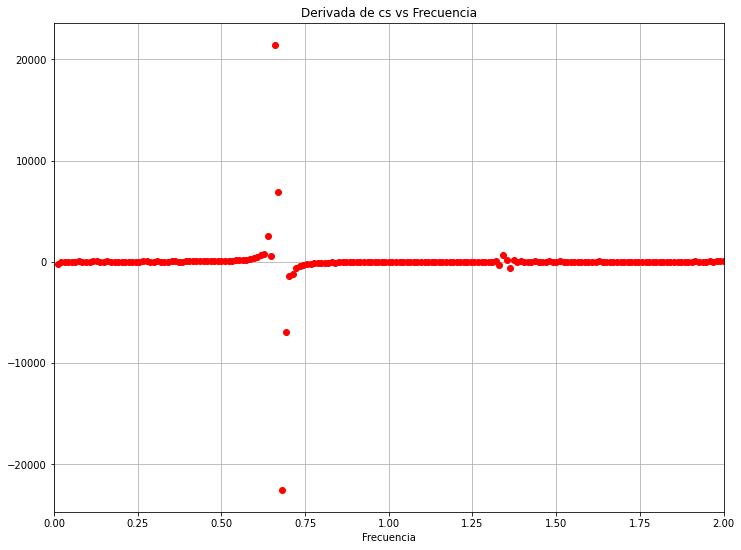

In [27]:
plt.figure(figsize=(12,9))
plt.plot(xf[1:N//2],devcs1(xf[1:N//2]),"ro") #grafico de la derivada de cs
plt.xlabel("Frecuencia")
plt.title("Derivada de cs vs Frecuencia")
plt.grid()
plt.xlim(0,2)
#plt.ylim(-0.5,0.5) #edite

In [30]:
optimize.newton(devcs1,0.671,tol=1E-20) #frecuencia de oscilación del péndulo

**Yennifer Yuliana Guerrero Uchima_Mariana Fernadez Prieto**